In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()

bos_df = pd.DataFrame(boston.data,columns=boston.feature_names)
bos_df['PRICE'] = boston.target

In [13]:
bos_df.isnull().sum() #Check if null vals

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [14]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


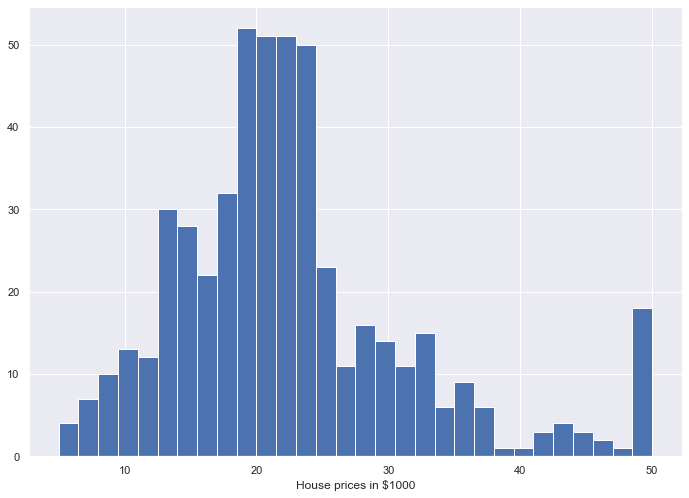

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos_df['PRICE'],bins=30)
plt.xlabel("House prices in $1000")
plt.show()

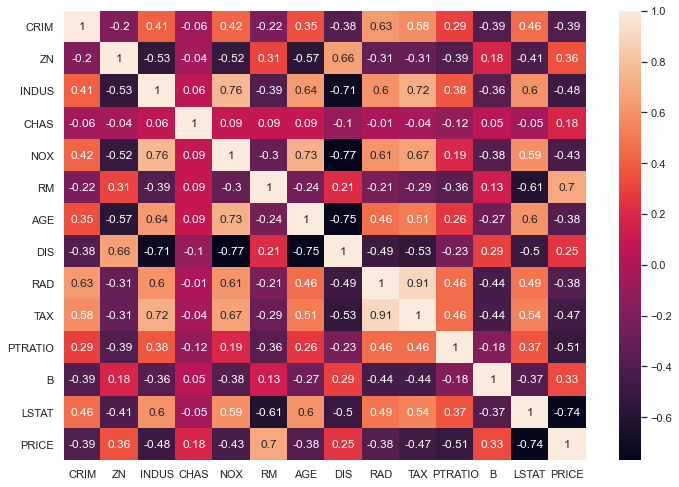

In [23]:
#Create df without price to see corr among the variables

bos_1 = pd.DataFrame(boston.data,columns=boston.feature_names)
correlation_matrix = bos_df.corr().round(2) #correlation matrix but rounded
sns.heatmap(data=correlation_matrix, annot=True) #Annot prints values in squares

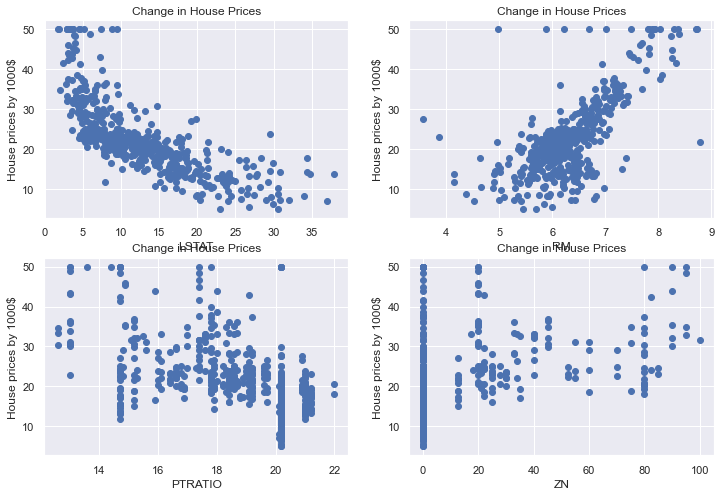

In [34]:
plt.figure(figsize=(12,8))

features = ['LSTAT','RM','PTRATIO','ZN'] #X 
target = bos_df['PRICE'] #Y

for i, feat in enumerate(features):
    plt.subplot(2,len(features)/2, i+1)#nrows,ncols, index
    x = bos_df[feat]
    y = target
    plt.scatter(x,y)
    #plt.plot(x,y)
    plt.title("Change in House Prices")
    plt.xlabel(feat)
    plt.ylabel('House prices by 1000$')

In [41]:
X_rooms = bos_df.RM
y_price = bos_df.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)


(506, 1)

In [43]:
#SPlit data into training and testing sets


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_rooms,y_price,test_size=.2,random_state=5)

In [44]:
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [45]:
#Training and testing the model

reg_1 = LinearRegression()
reg_1.fit(X_train_1,y_train_1)

LinearRegression()

In [46]:
#Model evaluation for training set

y_train_predcit_1 = reg_1.predict(X_train_1)

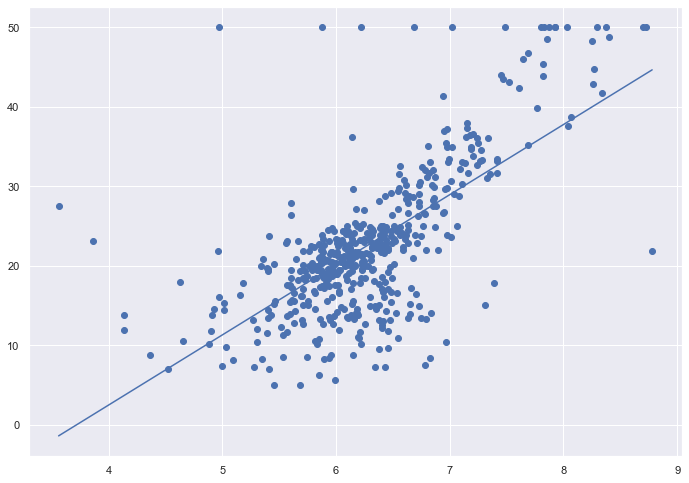

In [55]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms))
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space))

In [59]:
#More manual way degree 3
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = load_boston()['target']

sns.set()

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

#Square it
X_sq = X.apply(np.square)
X_sq.columns = X.columns+"_sq"

#Cube it
X_cb = X.pow(3)
X_cb.columns = X.columns+"_cb"

new_df3 = pd.concat((X, X_sq, X_cb), axis=1) #Merge all 3

new_df3["constant"] = 1 #Set constant

#X = sm.add_constant(X)

est3 = sm.OLS(y,new_df3).fit()

est3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     69.11
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          4.52e-165
Time:                        01:22:38   Log-Likelihood:                -1368.1
No. Observations:                 506   AIC:                             2812.
Df Residuals:                     468   BIC:                             2973.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.6902      0.167     -4.133      0.000      -1.018      -0.362
ZN             0.0388      0.062      0.623      0.533      -0.084       0.161
INDUS         -0.4663      0.462     -1.010      0.313      -1.374       0.441
CHAS           0.8544      0.237      3.613      0.000       0.390       1.319
NOX          378.6765    150.188      2.521      0.012      83.550     673.803
RM           -24.9684     16.221     -1.539      0.124     -56.844       6.907
AGE            0.0934      0.096      0.969      0.333      -0.096       0.283
DIS           -6.0695      1.466     -4.139      0.000      -8.951      -3.188
RAD            1.3791      0.698      1.976      0.049       0.008       2.750
TAX           -0.2003      0.075     -2.666      0.008      -0.348      -0.053
PTRATIO      -12.3726     15.559     -0.795      0.427     -42.947      18.202
B             -0.0047      0.028     -0.171      0.864      -0.059       0.050
LSTAT         -1.8291      0.302     -6.059      0.000      -2.422      -1.236
CRIM_sq        0.0134      0.005      2.516      0.012       0.003       0.024
ZN_sq         -0.0024      0.002     -1.203      0.230      -0.006       0.002
INDUS_sq       0.0480      0.042      1.154      0.249      -0.034       0.130
CHAS_sq        0.8389      0.237      3.546      0.000       0.374       1.304
NOX_sq      -642.8100    244.108     -2.633      0.009   -1122.494    -163.126
RM_sq          2.6770      2.588      1.034      0.301      -2.409       7.762
AGE_sq        -0.0022      0.002     -1.125      0.261      -0.006       0.002
DIS_sq         0.8336      0.259      3.217      0.001       0.324       1.343
RAD_sq        -0.1329      0.101     -1.319      0.188      -0.331       0.065
TAX_sq         0.0004      0.000      2.381      0.018    7.76e-05       0.001
PTRATIO_sq     0.5672      0.909      0.624      0.533      -1.219       2.353
B_sq           0.0001      0.000      0.854      0.394      -0.000       0.000
LSTAT_sq       0.0593      0.018      3.288      0.001       0.024       0.095
CRIM_cb    -8.519e-05   4.43e-05     -1.923      0.055      -0.000    1.85e-06
ZN_cb       2.424e-05   1.59e-05      1.527      0.127   -6.95e-06    5.54e-05
INDUS_cb      -0.0013      0.001     -1.253      0.211      -0.003       0.001
CHAS_cb        0.8409      0.237      3.554      0.000       0.376       1.306
NOX_cb       331.4957    128.969      2.570      0.010      78.066     584.926
RM_cb         -0.0484      0.135     -0.358      0.720      -0.314       0.217
AGE_cb      1.307e-05   1.14e-05      1.147      0.252   -9.32e-06    3.55e-05
DIS_cb        -0.0392      0.014     -2.794      0.005      -0.067      -0.012
RAD_cb         0.0038      0.003      1.178      0.239      -0.003       0.010
TAX_cb       -3.1e-07   1.41e-07     -2.204      0.028   -5.86e-07   -3.36e-08
PT

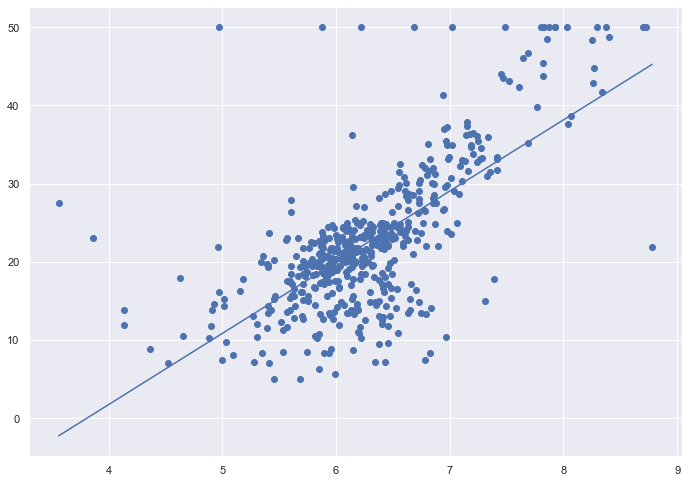

array([-2.25801069, -1.28854321, -0.31907572,  0.65039176,  1.61985925,
        2.58932673,  3.55879422,  4.5282617 ,  5.49772919,  6.46719667,
        7.43666416,  8.40613164,  9.37559913, 10.34506661, 11.3145341 ,
       12.28400158, 13.25346907, 14.22293655, 15.19240404, 16.16187152,
       17.13133901, 18.10080649, 19.07027398, 20.03974146, 21.00920895,
       21.97867643, 22.94814392, 23.9176114 , 24.88707889, 25.85654638,
       26.82601386, 27.79548135, 28.76494883, 29.73441632, 30.7038838 ,
       31.67335129, 32.64281877, 33.61228626, 34.58175374, 35.55122123,
       36.52068871, 37.4901562 , 38.45962368, 39.42909117, 40.39855865,
       41.36802614, 42.33749362, 43.30696111, 44.27642859, 45.24589608])

In [60]:
##Practice Linear 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target #Target is PRICE

#new_df3.corr().sort_values(by='PRICE') #Shows the correlation

bosti = new_df3.copy()
bosti['PRICE'] = load_boston().target

X_room = bosti['RM'] #New df with only RM_cb, ignores other features

y_price = bosti.PRICE #y is the price
y_price = np.array(y_price)

X_room = sm.add_constant(X_room) #Add constant
X_room = np.array(X_room)

results = sm.OLS(y_price,X_room).fit() #Model where price(depenedent) and number of room and occurrence is X
results.summary() 

bmin, bmax = bosti.RM.min(), bosti.RM.max() #Min & Max observed

#Max and Min of observed values
x_hat = sm.add_constant(np.linspace(bmin,bmax))

y_hat = results.predict(x_hat) #Want to predict given data

plt.plot(x_hat[:,1], y_hat) #Num or rooms and prediction of price
plt.scatter(bosti['RM'],y_price) #Num of rooms and actual price
plt.show()
#results.summary()
len(X_room)

y_hat

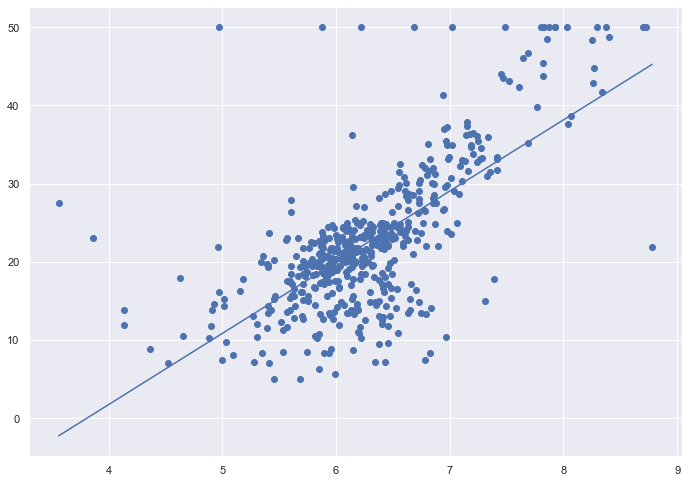

In [62]:
#Linear

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target #Target is PRICE

new_df3

x = boston['RM']
y = boston['PRICE']

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()

x = x.drop('const',axis=1)

xfit = sm.add_constant(np.linspace(np.min(x), np.max(x)))

#xfit = np.concatenate([xfit, np.square(xfit[:,1])],axis=1) #[:, np.newaxis]), axis=1)

yfit = est.predict(xfit[:,np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(xfit[:,1], yfit)
plt.show()


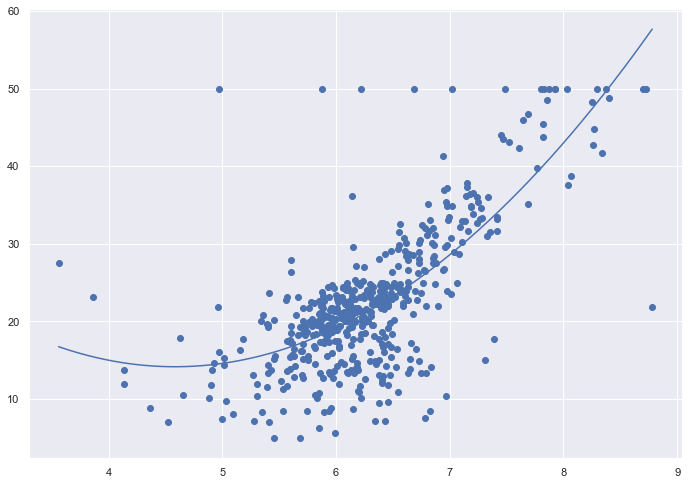

(506,)

In [67]:
#Practice Poly

##Practice

import matplotlib.pyplot as plt

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target #Target is PRICE

#new_df3.corr().sort_values(by='PRICE') #Shows the correlation

bosti = new_df3.copy()
bosti['PRICE'] = load_boston().target

X_room = bosti['RM'] #New df with only RM_cb, ignores other features

y_price = bosti.PRICE #y is the price
y_price = np.array(y_price)

X_room = sm.add_constant(X_room) #Add constant
X_room = np.array(X_room)
X_room = np.concatenate([X_room,np.square(X_room[:,1])[:,np.newaxis]],axis=1)#Square term 

results = sm.OLS(y_price,X_room).fit() #Model where price(depenedent) and number of room and occurrence is X
results.summary() 

bmin, bmax = bosti.RM.min(), bosti.RM.max() #Min & Max observed

#Max and Min of observed values
x_hat = sm.add_constant(np.linspace(bmin,bmax,len(bosti)))
x_hat = np.concatenate([x_hat,np.square(x_hat[:,1])[:,np.newaxis]],axis=1)#square term heree

y_hat = results.predict(x_hat[:,np.newaxis]) #Want to predict given data

plt.plot(x_hat[:,1], y_hat) #Num or rooms and prediction of price
plt.scatter(bosti['RM'],y_price) #Num of rooms and actual price
plt.show()
#results.summary()




['LSTAT', 'RM_cb', 'PTRATIO_cb', 'ZN'] ['LSTAT', 'RM', 'PTRATIO', 'ZN']
['LSTAT', 'RM_cb', 'PTRATIO_cb', 'ZN'] ['LSTAT', 'RM', 'PTRATIO', 'ZN']
['LSTAT', 'RM_cb', 'PTRATIO_cb', 'ZN'] ['LSTAT', 'RM', 'PTRATIO', 'ZN']
['LSTAT', 'RM_cb', 'PTRATIO_cb', 'ZN'] ['LSTAT', 'RM', 'PTRATIO', 'ZN']


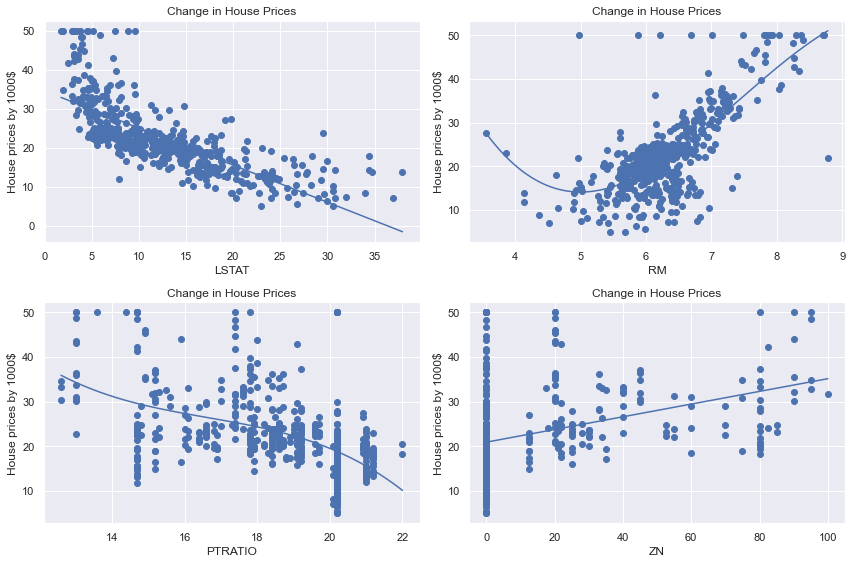

In [178]:
from sklearn.datasets import load_boston

def reg_plot_on_ax(feature):
    """
    Takes a feature and an axis and
    returns a plot for the four chosen
    features and axes.
    """
    boston = load_boston()

    bos_df = pd.DataFrame(boston.data,columns=boston.feature_names)
    bos_df['PRICE'] = boston.target
    
    feats = feature #Need to format features  to be only 
    features = []
    
    #Slices feature name so we remove the _sq or _cb
    for f in feats:
        if f[-3:] == '_sq':
            features.append(f[:-3])
        elif f[-3:] == '_cb':
            features.append(f[:-3])
        else:
            features.append(f)
            
    target = bos_df['PRICE'] #Y

    n = 0 #counter for below
    
    plt.figure(figsize=(12,8))
    for i, feat in enumerate(features):

        plt.subplot(2,len(features)//2, i+1)#nrows,ncols, index
        x = bos_df[feat]
        y = target

        x1 = sm.add_constant(x) #Add constant
        x1 = np.array(x1) # Deg 1
        x2 = np.concatenate([x1,np.square(x1[:,1])[:,np.newaxis]],axis=1)# Deg 2
        x3 = np.concatenate([x2,(x1[:,1]**3)[:,np.newaxis]],axis=1)

        results1 = sm.OLS(y,x1).fit()
        results2 = sm.OLS(y,x2).fit()
        results3 = sm.OLS(y,x3).fit()

        xmin,xmax = bos_df[feat].min(), bos_df[feat].max()

        x_hat1 = sm.add_constant(np.linspace(xmin,xmax,len(bos_df)))
        x_hat2 = np.concatenate([x_hat1,np.square(x_hat1[:,1])[:,np.newaxis]],axis=1)#square term heree
        x_hat3 = np.concatenate([x_hat2,(x_hat1[:,1]**3)[:,np.newaxis]],axis=1) #Third Degree

        y_hat1 = results1.predict(x_hat1[:,np.newaxis]) # Degree 1 predictions
        y_hat2 = results2.predict(x_hat2[:,np.newaxis]) # Degree 2 preds
        y_hat3 = results3.predict(x_hat3[:,np.newaxis]) # Degree 3 preds

        #Sets regression degree to feature degree
        if feats[n][-3:] == '_sq': 
            y_hat = y_hat2
        elif feats[n][-3:] =='_cb':
            y_hat = y_hat3
        else:
            y_hat = y_hat1  
        n +=1 
        
        plt.scatter(x1[:,1],y)
        plt.plot(x_hat1[:,1],y_hat)
        plt.title("Change in House Prices")
        plt.xlabel(feat)
        plt.ylabel('House prices by 1000$')
        plt.tight_layout()
        print(feats,features)
        
feature = ['LSTAT','RM_cb','PTRATIO_cb','ZN']
reg_plot_on_ax(feature)

In [ ]:
#Practice Poly

##Practice

import matplotlib.pyplot as plt

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target #Target is PRICE

#new_df3.corr().sort_values(by='PRICE') #Shows the correlation

bosti = new_df3.copy()
bosti['PRICE'] = load_boston().target

X_room = bosti['RM'] #New df with only RM_cb, ignores other features

y_price = bosti.PRICE #y is the price
y_price = np.array(y_price)

X_room = sm.add_constant(X_room) #Add constant
X_room = np.array(X_room)
X_room = np.concatenate([X_room,np.square(X_room[:,1])[:,np.newaxis]],axis=1)#Square term 

results = sm.OLS(y_price,X_room).fit() #Model where price(depenedent) and number of room and occurrence is X
results.summary() 

bmin, bmax = bosti.RM.min(), bosti.RM.max() #Min & Max observed

#Max and Min of observed values
x_hat = sm.add_constant(np.linspace(bmin,bmax,len(bosti)))
x_hat = np.concatenate([x_hat,np.square(x_hat[:,1])[:,np.newaxis]],axis=1)#square term heree

y_hat = results.predict(x_hat[:,np.newaxis]) #Want to predict given data

plt.plot(x_hat[:,1], y_hat) #Num or rooms and prediction of price
plt.scatter(bosti['RM'],y_price) #Num of rooms and actual price
plt.show()
#results.summary()




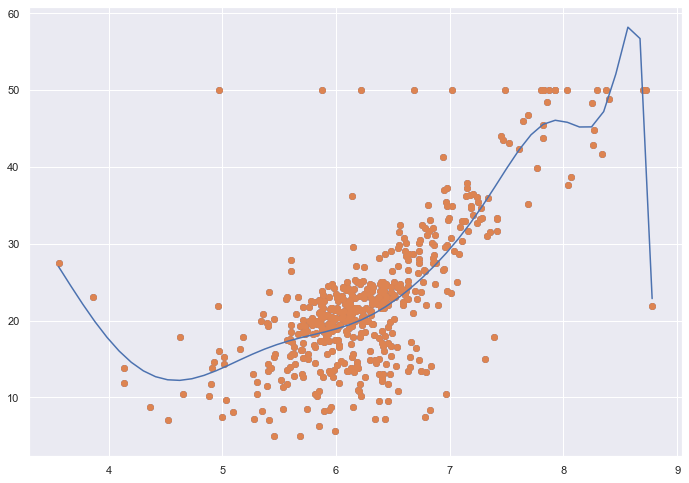

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target #Target is PRICE

#new_df3.corr().sort_values(by='PRICE') #Shows the correlation

bosti = new_df3.copy()
bosti['PRICE'] = load_boston().target

POLY_DEGREE = 20

x = bosti['RM']
y = bosti.PRICE
plt.scatter(x, y)

# make_pipeline is going to be taught in the data engineering module
# For now understand it links transformer functions into each other
model = make_pipeline(PolynomialFeatures(POLY_DEGREE),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
xfit = np.linspace(x.min(), x.max())
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

In [104]:
x = 'ABC_cb'
x[:-3]

'ABC'

In [118]:
feats = ['LSTAT','RM_cb','PTRATIO','INDUS'] #Need to format features  to be only 
features = []
for f in feats:
    if f[-3:] == '_sq':
        features.append(f[:-3])
    if f[-3:] == '_cb':
        features.append(f[:-3])
    else:
        features.append(f)
        
print(features)

['LSTAT', 'RM', 'PTRATIO', 'INDUS']


In [122]:
feats[1][:-3]

'RM'